In [ ]:
# 이상치탐지 - 군집화 형식
# 추천시스템

# 머신러닝
### 1번 

### 데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     


### 데이터 출처
- https://archive.ics.uci.edu/ml/index.php

In [9]:
# import ssl
# import pandas as pd
# import urllib
# context = ssl._create_unverified_context()

# url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem1.csv'
# encoded_url1 = urllib.parse.quote(url1, safe=':/')

# response = urllib.request.urlopen(encoded_url1, context=context)
# df1 = pd.read_csv(response, encoding='utf-8')
# df1

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("C:/Users/LG/Desktop/0721/problem1.csv")
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_importlib.py:42: SetuptoolsWarning: Incompatibility problem.
!!

        ********************************************************************************
        `importlib-metadata` version is incompatible with `setuptools`.
        This problem is likely to be solved by installing an updated version of
        `importlib-metadata`.

        See https://github.com/python/importlib_metadata/issues/396 for details.
        ********************************************************************************

!!
  disable_importlib_metadata_finder(metadata)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583,France


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  int64  
 7   Country      35801 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.2+ MB


In [3]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

#### 1-1. 결측치를 확인하고, 결측치 제거할 것

In [4]:
# !pip install pandas_profiling
df1.isna().sum()
df1 = df1.dropna()

#### 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

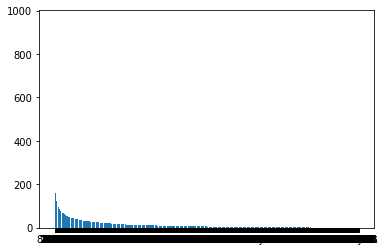

In [25]:
## 카테고리 박스플랏
# import seaborn as sns
# import matplotlib.pyplot as plt
# StockCode_bar = df1['StockCode'].value_counts()
# plt.bar(StockCode_bar.index, StockCode_bar.values, bottom=None, align='center')
# plt.show()

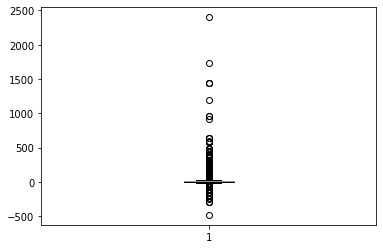

In [44]:
plt.boxplot(df1['Quantity'])
plt.show()

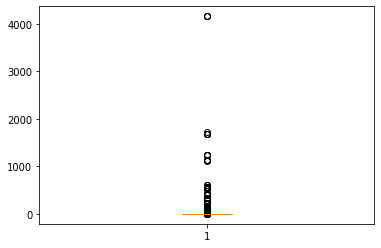

In [45]:
# outlier 제거
plt.boxplot(df1['UnitPrice'])
plt.show()

In [62]:
def outliers_iqr(dt, col):
    q1, q3 = np.percentile(dt[col], [25,75])
    iqr = q3-q1
    lower_whis = q1 - (iqr*1.5)
    upper_whis = q3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

In [89]:
df1.CustomerID.nunique()

289

In [5]:
## 기간 보기 
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate']) ## 문자열로된 날짜를 Timestamp형식으로 변환
 
set_of_year_month = list(set([(x.year, x.month) for x in df1['InvoiceDate']])) ## 송장날짜에서 연도와 월정보를 가져온다.
for ym in sorted(set_of_year_month, key=lambda x: (x[0], x[1])): ## 연도와 월정보를 연도, 월 순으로 출력 
    print(f'{ym[0]}년 {ym[1]}월')

2010년 12월
2011년 1월
2011년 2월
2011년 3월
2011년 4월
2011년 5월
2011년 6월
2011년 7월
2011년 8월
2011년 9월
2011년 10월
2011년 11월
2011년 12월


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
nation_data = Counter(df1['Country']).most_common() ## 데이터 개수가 많은 순으로 출력
nation_data = nation_data[:5] ## 상위 5개만 저장
 
data = [x[1] for x in nation_data] ## 데이터 개수
nations = [x[0] for x in nation_data] ## 국가
 
## 수평 바차트에서 데이터 개수와 나라를 맨위로 출력하기 위해서 리스트 순서를 바꿈
nations.reverse()
data.reverse()
 
## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정
 
plt.barh(nations, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

<Figure size 800x800 with 1 Axes>

In [7]:
## 구매 취소 데이터 삭제
df1 = df1.query('InvoiceNo.str.get(0) != "C"')

In [8]:
## 고객별 최근 방문일, 방문횟수, 구매금액 기준으로 점수 구하기
# 고객별 구매금액
df1['Monetary'] = df1['UnitPrice']*df1['Quantity']
고객구매금액 = df1[['CustomerID','Monetary']].groupby('CustomerID').agg('sum').reset_index()
고객최근방문일 = df1[['CustomerID','InvoiceDate']].groupby('CustomerID').agg('max').reset_index().rename(columns={'InvoiceDate':'Recency'})

고객방문횟수 = df1[['CustomerID','InvoiceNo']].drop_duplicates()\
.groupby('CustomerID')['InvoiceNo'].count().reset_index()\
.rename(columns={'InvoiceNo':'Frequency'})

rfm_df = pd.merge(고객구매금액,고객최근방문일, how ='left',on ='CustomerID')
rfm_df = pd.merge(rfm_df,고객방문횟수, how ='left',on ='CustomerID')

In [9]:
rfm_df

,CustomerID,Monetary,Recency,Frequency
0,12354,1062.80,2011-04-21 13:11:00,1
1,12356,2811.43,2011-11-17 08:40:00,3
2,12357,6207.67,2011-11-06 16:07:00,1
3,12361,189.90,2011-02-25 13:51:00,1
4,12362,5195.93,2011-12-06 15:40:00,10
...,...,...,...,...
282,14277,4216.20,2011-11-24 15:01:00,3
283,14335,468.26,2011-11-23 13:41:00,2
284,14646,279767.61,2011-12-08 12:12:00,74
285,14911,143271.49,2011-12-08 15:54:00,201


In [10]:
rfm_df['Recency']

0     2011-04-21 13:11:00
1     2011-11-17 08:40:00
2     2011-11-06 16:07:00
3     2011-02-25 13:51:00
4     2011-12-06 15:40:00
              ...        
282   2011-11-24 15:01:00
283   2011-11-23 13:41:00
284   2011-12-08 12:12:00
285   2011-12-08 15:54:00
286   2011-12-07 17:05:00
Name: Recency, Length: 287, dtype: datetime64[ns]

In [11]:
## 최근구매시간 변환 : 현재일자 기준으로 가장 가까울수록 큰값

current_day = pd.to_datetime('20110101')
time_diff = rfm_df['Recency']-current_day
time_in_seconds = [x.total_seconds() for x in time_diff] # 시간차이를 초단위로 계산

rfm_df['Recency'] = time_in_seconds

In [28]:
rfm_df

,CustomerID,Monetary,Recency,Frequency
0,12354,1062.80,9551460.0,1
1,12356,2811.43,27679200.0,3
2,12357,6207.67,26755620.0,1
3,12361,189.90,4801860.0,1
4,12362,5195.93,29346000.0,10
...,...,...,...,...
282,14277,4216.20,28306860.0,3
283,14335,468.26,28215660.0,2
284,14646,279767.61,29506320.0,74
285,14911,143271.49,29519640.0,201


#### 1-3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하고 더 좋은 모델을 선택하라

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


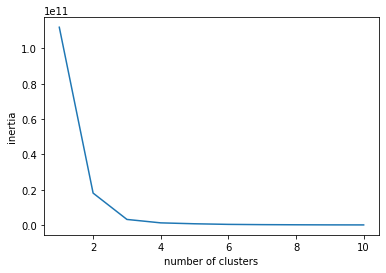

In [45]:
from sklearn.cluster import KMeans

x_monetary = np.array(rfm_df[['Monetary']]).reshape(-1,1)
inertia = []
for i in range(1,11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(x_monetary)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


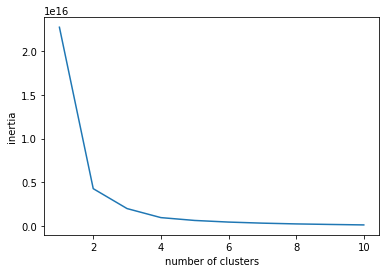

In [30]:
from sklearn.cluster import KMeans

x_recency = np.array(rfm_df[['Recency']]).reshape(-1,1)
inertia = []
for i in range(1,11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(x_recency)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


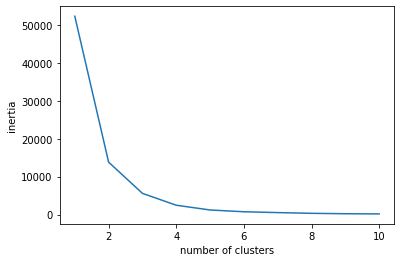

In [31]:
from sklearn.cluster import KMeans

x_frequency = np.array(rfm_df[['Frequency']]).reshape(-1,1)
inertia = []
for i in range(1,11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(x_frequency)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [32]:
## 주의: x_feature 데이터프레임 과 cluster저장할 테이블 분리해서 사용하기!
from sklearn.metrics import silhouette_score, silhouette_samples
# x_monetary
# x_recency
# x_frequency

M_X_feature = pd.DataFrame(x_monetary) # 학습데이터 2d array로 해줘야함
M_df_cluster = M_X_feature

M_kmeans = KMeans(n_clusters=3, random_state=42)
M_kmeans.fit(M_df_cluster)
rfm_df['M_cluster'] = M_kmeans.labels_


R_X_feature = pd.DataFrame(x_recency) # 학습데이터 2d array로 해줘야함
R_df_cluster = R_X_feature

R_kmeans = KMeans(n_clusters=3, random_state=42)
R_kmeans.fit(R_df_cluster)
rfm_df['R_cluster'] = R_kmeans.labels_



F_X_feature = pd.DataFrame(x_frequency) # 학습데이터 2d array로 해줘야함
F_df_cluster = F_X_feature

F_kmeans = KMeans(n_clusters=3, random_state=42)
F_kmeans.fit(F_df_cluster)
rfm_df['F_cluster'] = F_kmeans.labels_


In [33]:
rfm_df

,CustomerID,Monetary,Recency,Frequency,M_cluster,R_cluster,F_cluster
0,12354,1062.80,9551460.0,1,0,0,0
1,12356,2811.43,27679200.0,3,0,1,0
2,12357,6207.67,26755620.0,1,0,1,0
3,12361,189.90,4801860.0,1,0,2,0
4,12362,5195.93,29346000.0,10,0,1,0
...,...,...,...,...,...,...,...
282,14277,4216.20,28306860.0,3,0,1,0
283,14335,468.26,28215660.0,2,0,1,0
284,14646,279767.61,29506320.0,74,1,1,2
285,14911,143271.49,29519640.0,201,2,1,1


### 2번
#### 2-1. 위에서 생성한 군집들의 특성을 분석할 것

#### 2-2. 각 군집 별 대표 추천 상품을 도출할 것

#### 2-3. CustomerID가 12413인 고객을 대상으로 KNN을 이용하여 추천할 상품을 제시해라

In [164]:
rfm_df[rfm_df['CustomerID']==12413]

,CustomerID,Monetary,Recency,Frequency,M_cluster,R_cluster,F_cluster
25,12413,758.1,23878800.0,3,0,1,0


# 통계

### 3. 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90% 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [39]:
# z(90%)*sqrt(n)/sigma <= 0.05
# (z90%*sigma/0.05) ** 2 = n
sigma = np.sqrt(0.5*0.5)
(1.645 * sigma / 0.05) ** 2

270.60249999999996

### 4. A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem4.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [13]:
import ssl
import pandas as pd
import urllib
# context = ssl._create_unverified_context()

# url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem4.csv'
# encoded_url2 = urllib.parse.quote(url2, safe=':/')

# response = urllib.request.urlopen(encoded_url2, context=context)
# df2 = pd.read_csv(response, encoding='utf-8')
# df2

df2 = pd.read_csv("C:/Users/LG/Desktop/0721/problem4.csv")
df2.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


#### 4-1 연구가설과 귀무가설을 설정하라

In [14]:
# H0 : 남녀학생 혈압평균 차이 없다
# H1 : Not H0    

#### 4-2 소수점 2자리 반올림하여 95% 신뢰구간을 구하라. 연구가설 채택여부를 결정하고, 신뢰구간이 연구가설 채택에 어떤 역할을 하는지 설명하라.

In [15]:
# ci = x - z0.05*sigma/sqrt(n)
import numpy as np
from scipy.stats import t, ttest_ind

male = df2.loc[df2['gender']=='male','pressure']
female = df2.loc[df2['gender']=='female','pressure']

ttest_ind(male, female)

Ttest_indResult(statistic=1.598335024574904, pvalue=0.12361716364314851)

In [16]:
# x-y - t0.95*sigma/sqrt(n)
mean_diff = np.mean(male)-np.mean(female) 
sigma_sqrtn = np.sqrt(np.var(male, ddof=1) / len(male) + np.var(female, ddof=1) / len(female))
t_stat = t.ppf(0.95, len(male)+len(female)-2) 

print("mean: ", mean_diff, ", CI:", (mean_diff - t_stat*sigma_sqrtn, mean_diff + t_stat*sigma_sqrtn))

## 남녀평균차이가 해당 신뢰구간에 포함될 확률이 95%임, 따라서 0이 포함되므로 평균의 차이가 없다고 볼 수 있음

mean:  6.307638888888917 , CI: (-0.7604917620862448, 13.375769539864079)


### 5번 아래는 후보A의 선거구별 지지 현황표다. 후보A의 지지율이 선거구별로 차이가 있는지를 검정하라.

<img width="498" src="https://github.com/Ssunbell/ADP_study/assets/97590480/3b057a61-b1e2-42c7-895d-c3234b866975">

#### 5-1. 귀무가설과 연구가설을 설정하라 

In [ ]:
# H0 : 선거구별로 차이가 없다
# H1 : Not H0

#### 5-2. 소수점 2자리 반올림하여 통계량을 구하고 95% 수준에서 연구가설 채택여부를 결정하라.

In [70]:
table = pd.DataFrame({"no1":(176,124), "no2":(193,107), "no3":[159,141]}, index=['찬성','반대'])
table

,no1,no2,no3
찬성,176,193,159
반대,124,107,141


In [73]:
## 1. 정규성 정규성 검정 방법: Shaprio Test
# H0: 변수는 정규 분포를 따를 것이다. 
# H1: 변수는 정규 분포를 따르지 않을 것이다. 

import scipy.stats as stats
# stats.shapiro(table['no1'], table['no2'], table['no3'])
stats.kstest(table['no1'], table['no2'], table['no3'])

## 기각하지않음. 즉 정규분포 따름

KstestResult(statistic=0.5, pvalue=1.0)

In [72]:
# 2.등분산성 가정
# 가정의 의미: 각 변수의 분산은 동일한 수준의 분산을 가져야 한다. 
# 등분산성 검정 방법: Barlett 검정 또는 Levene 방법
# H0: 변수 간 분산에 유의미한 차이가 없을 것이다. 
# H1: 변수 간 분산에 유의미한 차이가 있을 것이다.
from scipy.stats import bartlett
stats.bartlett(table['no1'], table['no2'], table['no3'])

## 유의수준 0.05 에서 기각못함. 변수 간 유의미한 차이 없음

BartlettResult(statistic=1.2931171926559721, pvalue=0.5238454419251148)

In [ ]:
# 독립성 가정

In [76]:
# 아노바 테스트
stats.f_oneway(table['no1'], table['no2'], table['no3'])
## --> 선거구별로 차이가 없다

F_onewayResult(statistic=0.0, pvalue=1.0)

### 6. 1월 ~9월까지 9개월간의 국제 Silver 가격이 다음과 같다. 

<img width="463" src="https://github.com/Ssunbell/ADP_study/assets/97590480/ebcaf02c-2ef9-47c5-aed1-4514d3e01370">

#### 6-1. 1월 대비 9월의 은값 상승률을 소수점 2자리 반올림하여 구하라 

In [77]:
np.round(31.38/12.14,2)

2.58

#### 6-2. Silver 가격의 추이를 이동평균(3N)과 함께 나타나도록 시각화하라 

In [19]:
silver = pd.DataFrame({'1월': [12.14], '2월': [42.6], '3월': [34.4]
                        ,'4월': [35.29], '5월': [30.96], '6월': [57.12]
                       , '7월': [37.84], '8월': [42.49], '9월': [31.39]}, index=['은 usd/oz'])
silver_T = silver.T

In [93]:
silver_T['이동평균']  = silver.T.rolling(window=3).mean().fillna(method='bfill')

In [94]:
silver_T

,은 usd/oz,이동평균
1월,12.14,29.713333
2월,42.60,29.713333
3월,34.40,29.713333
4월,35.29,37.430000
5월,30.96,33.550000
6월,57.12,41.123333
7월,37.84,41.973333
8월,42.49,45.816667
9월,31.39,37.240000


In [95]:
class font_setting():
    def __init__(self):
        self.font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
        self.path = "./NanumGothic-Regular.ttf"
        
    def get_font(self):
        import requests
        from matplotlib import font_manager, rc
        import matplotlib.pyplot as plt
        
        res = requests.get(self.font_url)
        
        with open(self.path, "wb") as font_file:
            font_file.write(res.content)
        
        font_manager.fontManager.ttflist += font_manager.createFontList([self.path])
        rc('font', family='NanumGothic')
        plt.rcParams["font.family"] = 'NanumGothic'
    
    def delete_font(self):
        import os
        os.remove(self.path)

font_set = font_setting()
font_set.get_font()

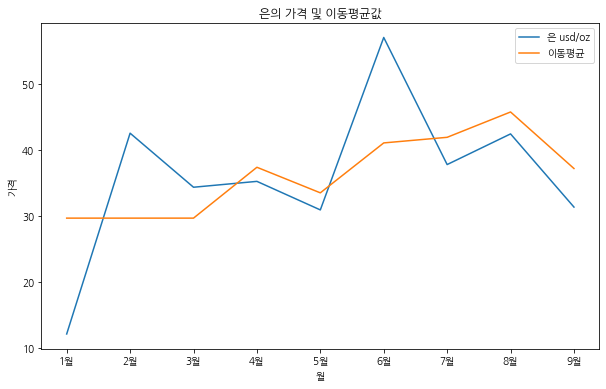

In [96]:
# 시계열 그래프 그리기
silver_T.plot(figsize=(10, 6))
plt.title('은의 가격 및 이동평균값')
plt.xlabel('월')
plt.ylabel('가격')
plt.legend()
plt.show()

In [21]:
price_january = silver['1월'][0]
price_september = silver['9월'][0]

# 가격 변동 계산
price_change = price_september - price_january

# 가격 변동 비율 계산 (올림하여 소수점 둘째 자리에서 반올림)
price_change_percentage = round((price_change / price_january) * 100, 2)
price_change_percentage

158.57

In [22]:
price_september, price_january

(31.39, 12.14)

### 7. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라. A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다. 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

In [4]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem7.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response, encoding='utf-8')
df3

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


#### 7-1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [18]:
### height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
# A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
# 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.
# PyMC3 모델 설정
with pm.Model() as model:
    # 사전분포 설정
    beta0 = pm.Uniform('beta0')
    beta1 = pm.Uniform('beta1')
    beta2 = pm.Uniform('beta2')
    sigma = pm.InverseGamma('sigma', alpha=0.005, beta=0.005)

    # 선형 회귀식 설정
    mu = beta0 + beta1 * data['height'] + beta2 * data['waist']

    # likelihood 설정
    obs = pm.Normal('obs', mu=mu, sd=sigma, observed=data['weight'])

    # MCMC 수행
    trace = pm.sample(10000, tune=1000, random_seed=1234)

# 회귀계수의 사후분포 추정치 출력
coefficients = trace['beta0'].mean(), trace['beta1'].mean(), trace['beta2'].mean()
print('회귀계수(Intercept, height, waist):', coefficients)

NameError: name 'pm' is not defined

#### 7-2  7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [ ]:
# 키 180cm, 허리둘레 85cm인 남성의 몸무게 추정
height_new = 180
waist_new = 85

with model:
    # 사후분포로부터 몸무게 예측
    weight_new = pm.Normal('weight_new', mu=beta0 + beta1 * height_new + beta2 * waist_new)